# Name : **Tanishta** **Varman**
# School :**SCDS**
# Email ID : *tanishta.m-26@scds.saiuniversity.edu.in*

# Import Libraires

In [1]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score, f1_score
from tensorflow import keras
tf.random.set_seed(42)

2.17.1


# Import Dataset from Transferlearning Model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from numpy import load
x_train_std = load ('/content/drive/MyDrive/Models_2_TL/X_train_std.npy' )
x_test_std = load ( '/content/drive/MyDrive/Models_2_TL/X_test_std.npy'  )
y_train = load ('/content/drive/MyDrive/Models_2_TL/y_train.npy')
y_test = load ('/content/drive/MyDrive/Models_2_TL/y_test.npy')

In [4]:
print("x_train_std shape : " .format(x_train_std.shape))
print("x_test_std shape : " .format(x_test_std.shape))

# we now save the best model we got from TL

ft_model=keras.models.load_model('/content/drive/MyDrive/Models_2_TL/01_DenseNet121_TransferLearning_Best_Model.h5')
ft_model.summary()

x_train_std shape : 
x_test_std shape : 


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, None, None, 3)  │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, None, None, 64) │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, None, None, 64) │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, None, None, 64) │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None,     │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None,     │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None,     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 32) │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, None, None, 96) │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_0_bn    

 Total params: 7,048,777 (26.89 MB)

 Trainable params: 6,963,079 (26.56 MB)

 Non-trainable params: 85,696 (334.75 KB)

 Optimizer params: 2 (12.00 B)

# Freezeing all other layers than the initial 35 %

In [5]:
totallayer=len(ft_model.layers)
index_split=int(0.35 * totallayer)
for i in ft_model.layers[:index_split]:
  i.trainable = False

### now we unfreeze the rest after the first 35%


In [6]:
for i in ft_model.layers[index_split:]:
  i.trainable=True

# Now we train the model

In [7]:
ft_model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])
calback_ft = [ keras.callbacks.ModelCheckpoint('bestTL.weights.h5', monitor='val_accuracy', save_best_only=True, save_weights_only=True)]
ft_hist=ft_model.fit(x=x_train_std, y=y_train ,  validation_split=0.1, batch_size=32,epochs=10 , callbacks=calback_ft)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 204s 9s/step - accuracy: 0.9479 - loss: 0.2150 - val_accuracy: 0.1795 - val_loss: 12.4209
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 268ms/step - accuracy: 0.9196 - loss: 0.2407 - val_accuracy: 0.4359 - val_loss: 7.5029
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.9737 - loss: 0.1092 - val_accuracy: 0.4103 - val_loss: 7.8333
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 276ms/step - accuracy: 0.9866 - loss: 0.0408 - val_accuracy: 0.5128 - val_loss: 5.2345
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 304ms/step - accuracy: 0.9912 - loss: 0.0281 - val_accuracy: 0.5641 - val_loss: 3.5070
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.9985 - loss: 0.0161 - val_accuracy: 0.5897 - val_loss: 4.0478
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 265ms/step - accuracy: 0.9874 - loss: 0.0625 - val_accuracy: 0.6154 - val_loss: 4.2799
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.9958 - loss: 0.0086 - val_accuracy: 0

# Graph

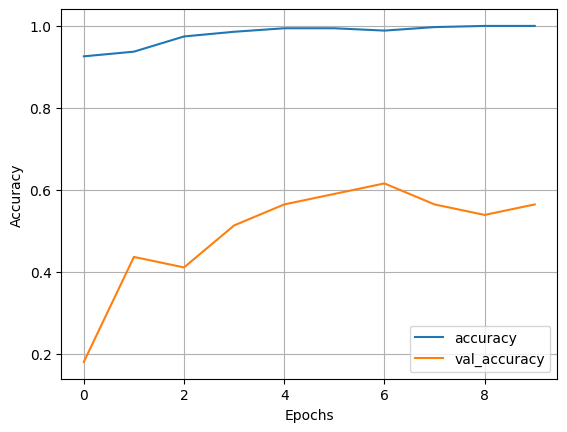

In [8]:
keys=['accuracy' , 'val_accuracy']
progress = { k:v for k , v in ft_hist.history.items() if k in keys}
import pandas as pd
pd.DataFrame(progress).plot()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

##Loss and Accuracy percentage

In [9]:
testloss_ft, testaccuracy_ft =ft_model.evaluate(x=x_test_std , y=y_test)
print("Test-Loss : %f , Test-Accuracy : %f " % (testloss_ft, testaccuracy_ft))

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7915 - loss: 1.5082
Test-Loss : 1.648247 , Test-Accuracy : 0.784615 


In [10]:
ft_model.load_weights("bestTL.weights.h5")
testloss_ft, testaccuracy_ft = ft_model.evaluate(x=x_test_std, y=y_test)
print("Test-Loss : %f , Test-Accuracy : %f " % (testloss_ft, testaccuracy_ft))

# prediction

pr=ft_model.predict(x_test_std)
label=np.argmax(pr, axis=-1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7488 - loss: 2.1531
Test-Loss : 2.397421 , Test-Accuracy : 0.730769 
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step


# Confusion Matrix

[[12  0  0  5  4  2  0]
 [ 0 17  0  3  0  0  0]
 [ 2  0  5  2  1  0  0]
 [ 0  0  0 10  3  3  0]
 [ 0  0  0  4 17  0  0]
 [ 1  1  0  0  3 17  0]
 [ 0  0  0  1  0  0 17]]


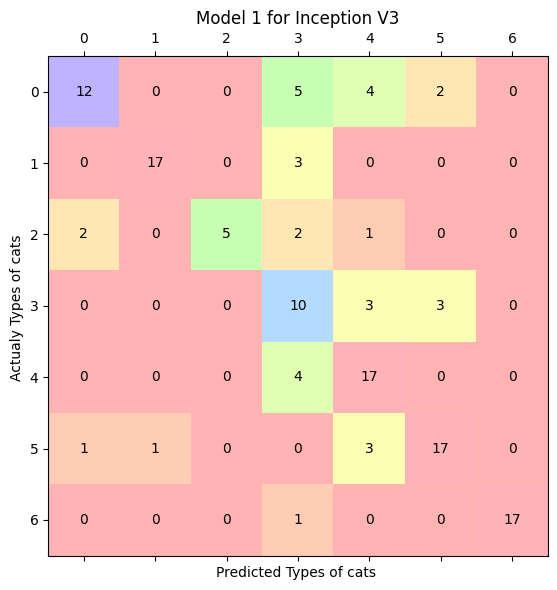

In [11]:
# the matrxi
cm=confusion_matrix(y_true= y_test , y_pred=label)
print(cm)
fig , ax = plt.subplots(figsize=(6,6))
ax.matshow(cm, cmap=plt.cm.hsv, alpha=0.3)
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(x=j, y=i, s=cm[i,j], va='center', ha= 'center')

ax.title.set_text('Model 1 for Inception V3')
plt.xlabel('Predicted Types of cats ')
plt.ylabel ('Actualy Types of cats ')
plt.tight_layout()
plt.savefig("ConfusionMatrix.png",dpi=300, format='png',pad_inches=0.3)
plt.show()

In [12]:
# Precision , Recall , F1
precision_score_model1=precision_score(y_true=y_test , y_pred=label , average='weighted')
print("The precision score of the model = " , precision_score_model1)

recall_score_model1=recall_score(y_true=y_test , y_pred=label , average='weighted')
print("The recall score of the model = " , recall_score_model1)

f1_score_model1=f1_score(y_true=y_test , y_pred=label , average='weighted')
print("The F1 score of the model = " , f1_score_model1)

The precision score of the model =  0.7802991452991452
The recall score of the model =  0.7307692307692307
The F1 score of the model =  0.7380749246474534


In [13]:
ft_model.save('/content/drive/MyDrive/Models_2_TL/02_DenseNet121_FineTuning_Best_Model.h5')